# #| Enhance the Resolving Python Framework

## Example: Tesla stock price over time.

We have the following `DataFrame` that contains information about the Tesla stock price from 2017:

In [1]:
import pandas as pd

df_tsla = pd.read_excel('tsla_stock.xlsx', sheet_name=1, parse_dates=['Date'])
df_tsla

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500,43.397999
1,2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500,45.397999
2,2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500,45.349998
3,2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500,45.801998
4,2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500,46.256001
...,...,...,...,...,...,...,...
1375,2022-06-21,730.729980,673.000000,673.809998,711.109985,40931000,711.109985
1376,2022-06-22,740.500000,701.479980,703.510010,708.260010,33702500,708.260010
1377,2022-06-23,717.950012,685.909973,713.719971,705.210022,34734200,705.210022
1378,2022-06-24,738.200012,708.260010,712.409973,737.119995,31866500,737.119995


In [2]:
import plotly.express as px

## Create a bar plot of the volume by each year

In [3]:
df_tsla = df_tsla.set_index('Date')
dfres = df_tsla.resample('Y').Volume.sum().reset_index()

In [4]:
dfres

,Date,Volume
0,2017-12-31,7950157000
1,2018-12-31,10808194000
2,2019-12-31,11540242000
3,2020-12-31,19052912400
4,2021-12-31,6902690500
5,2022-12-31,3407576732


In [5]:
import plotly.express as px

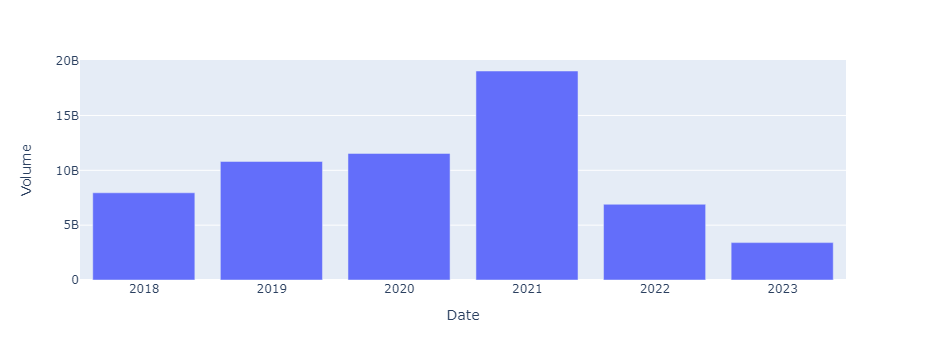

In [7]:
px.bar(data_frame=dfres, x='Date', y='Volume')

## Create a bar plot of the volume by each month

In [8]:
dfres = df_tsla.resample('M').Volume.sum().reset_index()

In [9]:
dfres

,Date,Volume
0,2017-01-31,503398000
1,2017-02-28,597700000
2,2017-03-31,535176500
3,2017-04-30,584753000
4,2017-05-31,740231500
...,...,...
61,2022-02-28,463708900
62,2022-03-31,576424300
63,2022-04-30,506986600
64,2022-05-31,649407200


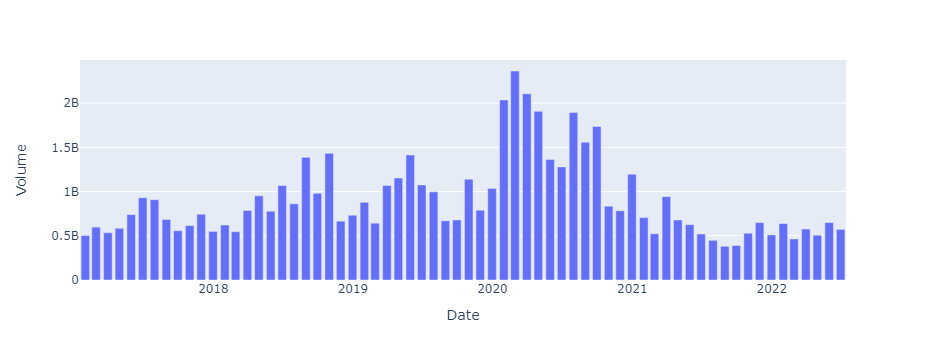

In [10]:
px.bar(data_frame=dfres, x='Date', y='Volume')

## Create an area plot of the volume by each month

In [11]:
dfres = df_tsla.resample('M').Volume.sum().reset_index()

In [12]:
dfres

,Date,Volume
0,2017-01-31,503398000
1,2017-02-28,597700000
2,2017-03-31,535176500
3,2017-04-30,584753000
4,2017-05-31,740231500
...,...,...
61,2022-02-28,463708900
62,2022-03-31,576424300
63,2022-04-30,506986600
64,2022-05-31,649407200


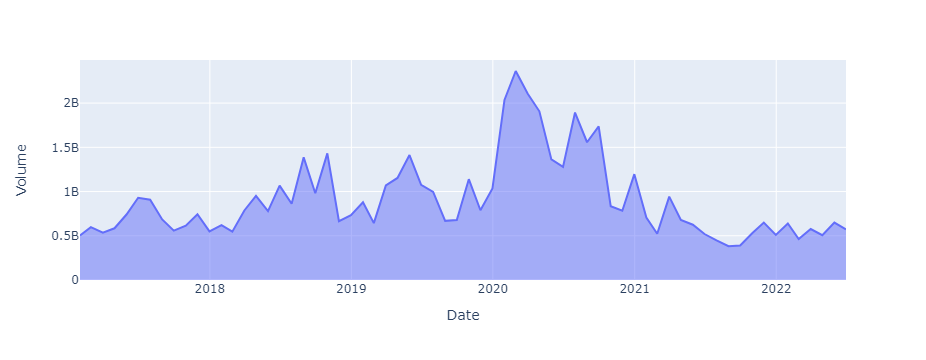

In [13]:
px.area(data_frame=dfres, x='Date', y='Volume')

## Who gives more tips on average: male or females?

In [14]:
df_tips = px.data.tips()
dfres = df_tips.groupby('sex').tip.mean().reset_index()

In [15]:
dfres

,sex,tip
0,Female,2.833448
1,Male,3.089618


### Bar plot

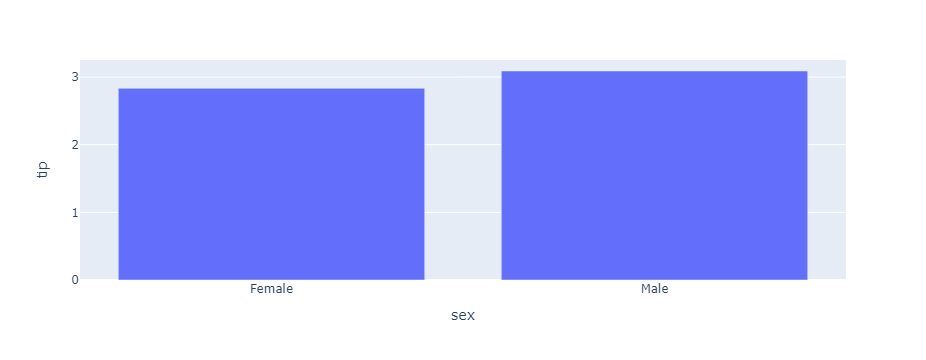

In [16]:
px.bar(data_frame=dfres, x='sex', y='tip')

### Pie plot

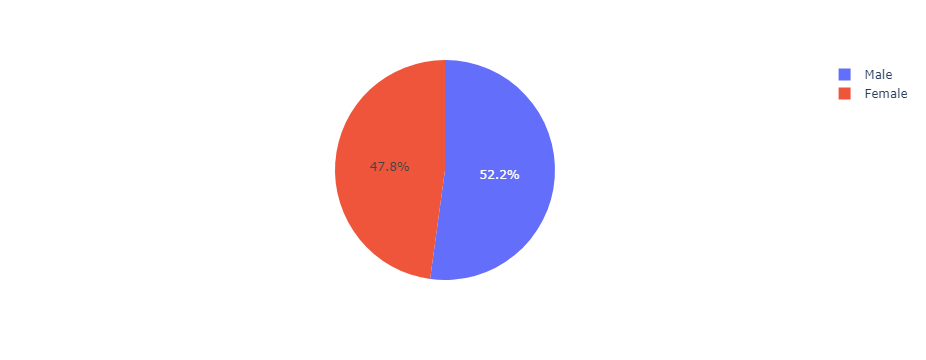

In [17]:
px.pie(data_frame=dfres, names='sex', values='tip')

## In which day people spend more money on the restaurant?

In [18]:
dfres = df_tips.groupby('day').total_bill.mean().reset_index()

In [19]:
dfres

,day,total_bill
0,Fri,17.151579
1,Sat,20.441379
2,Sun,21.410000
3,Thur,17.682742


### Bar plot

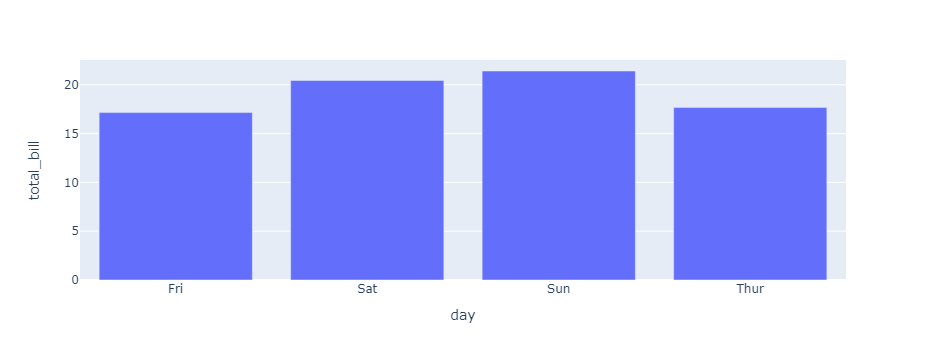

In [20]:
px.bar(data_frame=dfres, x='day', y='total_bill')

### Pie plot

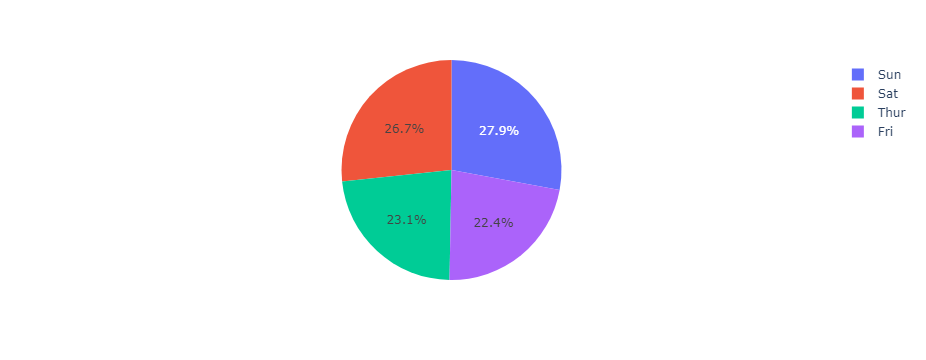

In [21]:
px.pie(data_frame=dfres, names='day', values='total_bill')

## In which day people spend more money on the restaurant based on the time (lunch or dinner)?

In [22]:
dfres = df_tips.groupby(['day', 'time']).total_bill.mean().reset_index()

In [23]:
dfres

,day,time,total_bill
0,Fri,Dinner,19.663333
1,Fri,Lunch,12.845714
2,Sat,Dinner,20.441379
3,Sun,Dinner,21.410000
4,Thur,Dinner,18.780000
5,Thur,Lunch,17.664754


### Bar plot

> You may use the `color` to distinguish the time

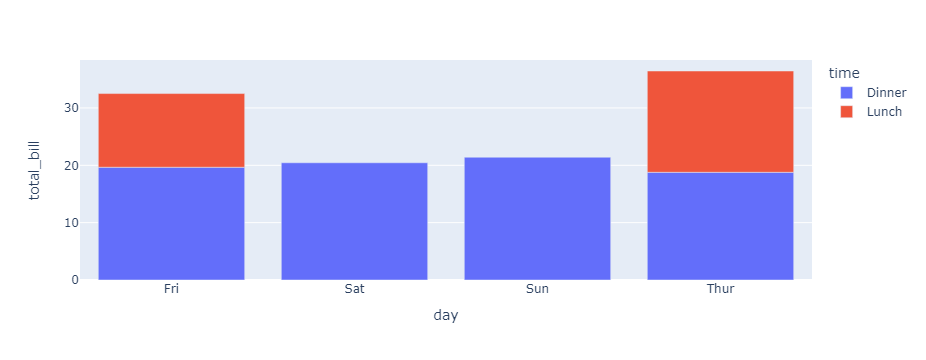

In [24]:
px.bar(data_frame=dfres, x='day', y='total_bill', color='time')

### Pie plot

> You may use the `facet_col` to distinguish the time

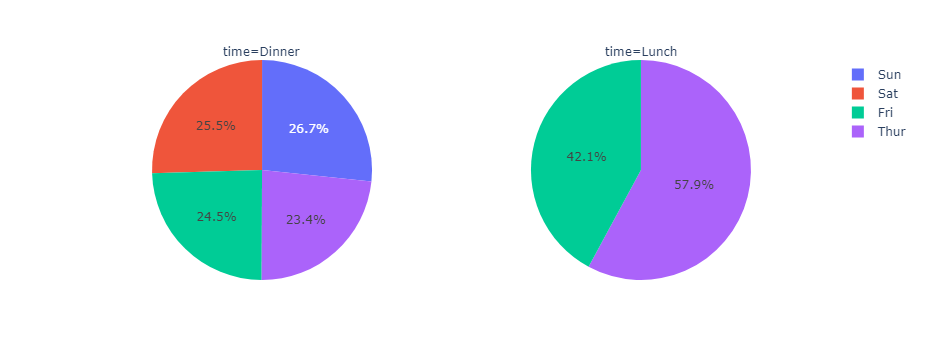

In [25]:
px.pie(data_frame=dfres, names='day', values='total_bill',facet_col='time')

## Which continent had a greater population?

In [26]:
df_gapminder = px.data.gapminder()

## Which continent had a greater population over the years?

In [27]:
dfres = df_gapminder.groupby(['year', 'continent']).pop.sum().reset_index()

In [28]:
dfres

,year,continent,pop
0,1952,Africa,237640501
1,1952,Americas,345152446
2,1952,Asia,1395357351
3,1952,Europe,418120846
4,1952,Oceania,10686006
5,1957,Africa,264837738
6,1957,Americas,386953916
7,1957,Asia,1562780599
8,1957,Europe,437890351
9,1957,Oceania,11941976


### Line plot

> You may distinguish each continent by the `color`

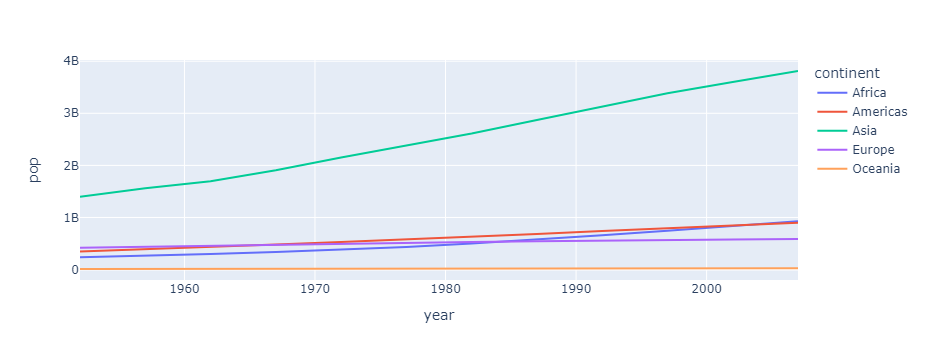

In [29]:
px.line(data_frame=dfres, x='year', y='pop', color='continent')

### Area plot

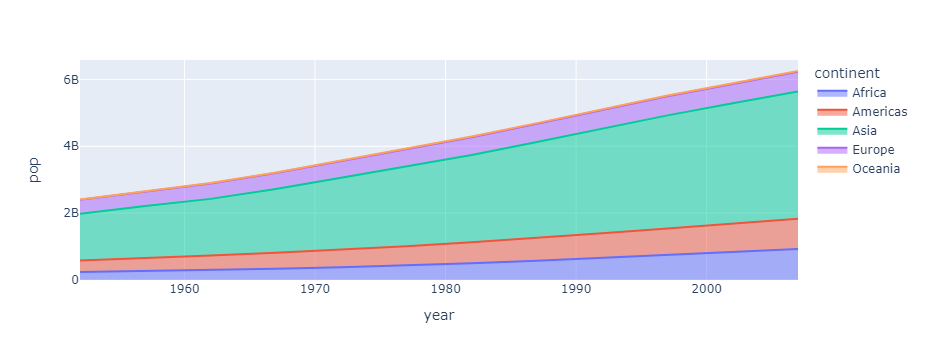

In [30]:
px.area(data_frame=dfres, x='year', y='pop', color='continent')

## Which continent had a greater population over the years?

### Line plot

> You may use the `facet_col` to distinguish the continent

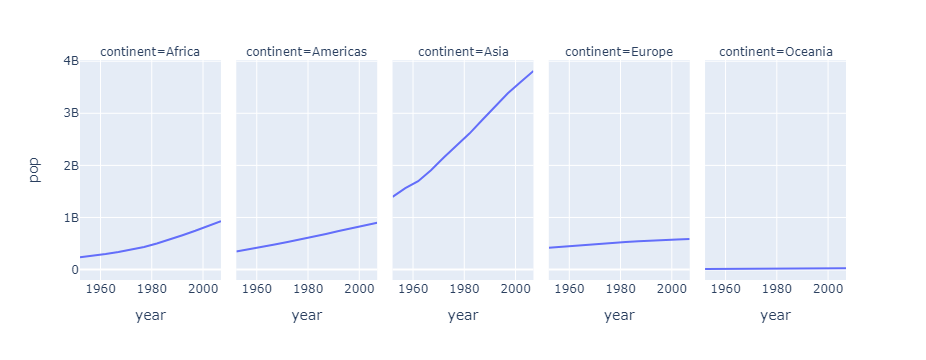

In [31]:
px.line(data_frame=dfres, x='year', y='pop', facet_col='continent')

### Area plot

> You may use the `facet_col` to distinguish the continent

## Which is the relationship between `gdpPercap` and `lifeExp`?

In [32]:
dfres = df_gapminder.query('year == 2007').reset_index(drop=True)

In [33]:
dfres

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
1,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
2,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
3,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
4,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
137,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
138,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
139,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
140,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


### Scatter plot

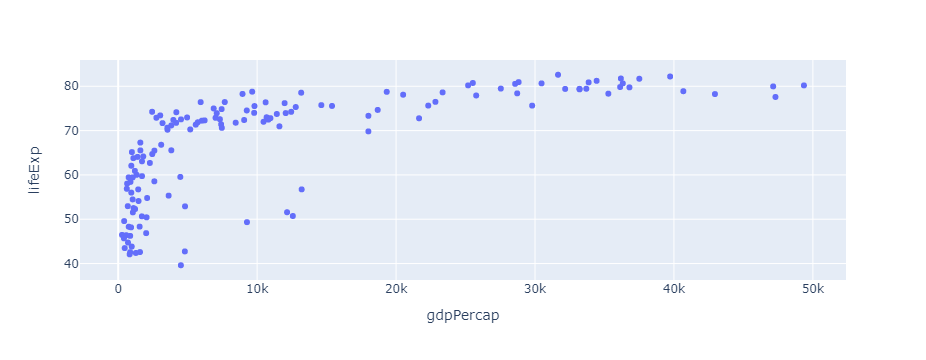

In [34]:
px.scatter(data_frame=dfres, x='gdpPercap', y='lifeExp')

#### Could you distinguish the continent by `color`?

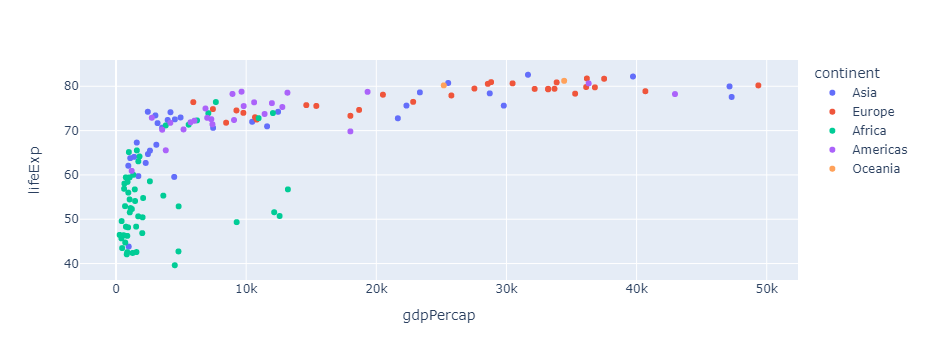

In [35]:
px.scatter(data_frame=dfres, x='gdpPercap', y='lifeExp', color='continent')

#### Could you increase the `size` of the points based on the population?

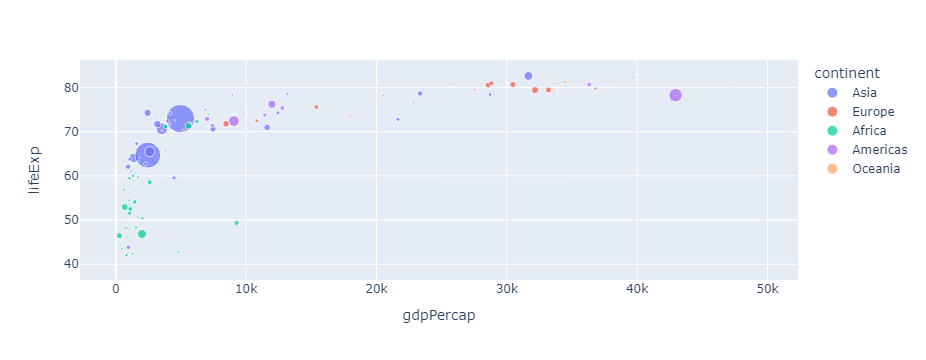

In [36]:
px.scatter(data_frame=dfres, x='gdpPercap', y='lifeExp', color='continent',size='pop')

#### Could you idenfity the country by hovering the mouse over the points?

> You may use the `hover_name` parameter

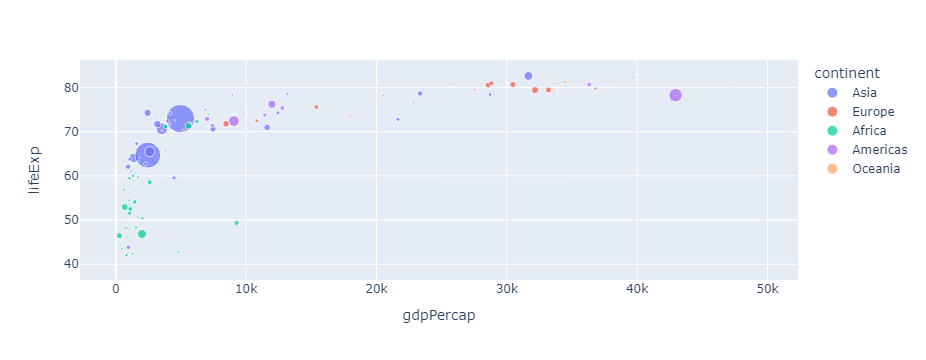

In [37]:
px.scatter(data_frame=dfres, x='gdpPercap', y='lifeExp', color='continent', size='pop', hover_name='country')

#### Could you shorten the distance between the high-income countries and the low-income countries?

> You may use the `log_x=True` parameter

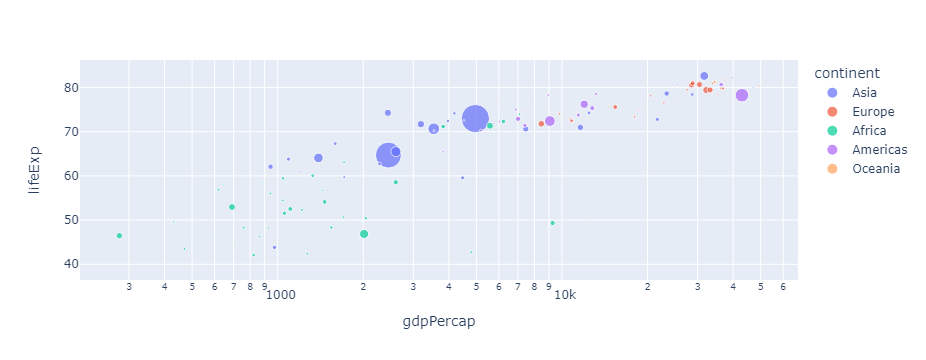

In [38]:
px.scatter(data_frame=dfres, x='gdpPercap', y='lifeExp', color='continent', size='pop', hover_name='country', log_x=True)